In [39]:
# Required Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
import random

# Set global random seed for Python's built-in random library
random.seed(42)

# Set global random seed for TensorFlow
tf.random.set_seed(42)

In [3]:
# Orginal disease data table
data = pd.read_csv('/content/drive/MyDrive/HW_VA_DS/disease_symptoms_dataset.csv')

# Copy original data table for analysis
disease_data = data.copy()

## Initial view of data

In [4]:
# View data and columns
disease_data.head(10)

Disease  Age  Gender  Latitude  Longitude   Symptom_1  \
0  Common Cold   45    Male    42.387    -95.223  Runny nose   
1          Flu   63  Female    41.722    -97.154       Fever   
2   Bronchitis   27    Male    44.586    -96.781       Cough   
3     Migraine   57  Female    43.251    -99.042    Headache   
4      Allergy   31    Male    45.129    -94.714  Itchy eyes   
5          Flu   53  Female    47.837    -97.872       Cough   
6  Common Cold   22    Male    48.295    -97.349  Runny nose   
7     Migraine   35  Female    44.903    -99.937    Headache   
8      Allergy   68    Male    42.804    -94.554  Itchy eyes   
9   Bronchitis   47  Female    49.168    -96.209       Cough   

             Symptom_2 Symptom_3  Symptom_4  Severity  
0             Sneezing       NaN       60.0       NaN  
1                Cough   Fatigue        NaN      80.0  
2  Shortness of breath       NaN        NaN      70.0  
3               Nausea       NaN        NaN      90.0  
4            Skin rash       NaN       50.0       NaN  
5  Shortness of breath       NaN        NaN      80.0  
6             Sneezing       NaN       60.0       NaN  
7               Nausea       NaN        NaN      90.0  
8            Skin rash       NaN       50.0       NaN  
9  Shortness of breath       NaN        NaN      70.0

In [5]:
# Check structure of data, data types, and missing info
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Disease    790 non-null    object 
 1   Age        790 non-null    int64  
 2   Gender     790 non-null    object 
 3   Latitude   790 non-null    float64
 4   Longitude  790 non-null    float64
 5   Symptom_1  790 non-null    object 
 6   Symptom_2  784 non-null    object 
 7   Symptom_3  486 non-null    object 
 8   Symptom_4  269 non-null    float64
 9   Severity   521 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 61.8+ KB


In [6]:
# Review summary stats
disease_data.describe()

Age    Latitude   Longitude   Symptom_4    Severity
count  790.000000  790.000000  790.000000  269.000000  521.000000
mean    44.948101   44.845775  -96.930827   73.141264   80.019194
std     13.501672    2.019071    1.740883   11.657525    8.682410
min      5.000000   41.396000  -99.937000   50.000000   50.000000
25%     35.000000   42.893000  -98.405000   70.000000   75.000000
50%     45.000000   44.903000  -96.781000   75.000000   80.000000
75%     55.000000   46.491000  -95.548000   80.000000   85.000000
max     75.000000   49.168000  -94.012000   95.000000   95.000000

In [7]:
# Number of missing data
disease_data.isna().sum()

Disease        0
Age            0
Gender         0
Latitude       0
Longitude      0
Symptom_1      0
Symptom_2      6
Symptom_3    304
Symptom_4    521
Severity     269
dtype: int64

## Disease Category Counts

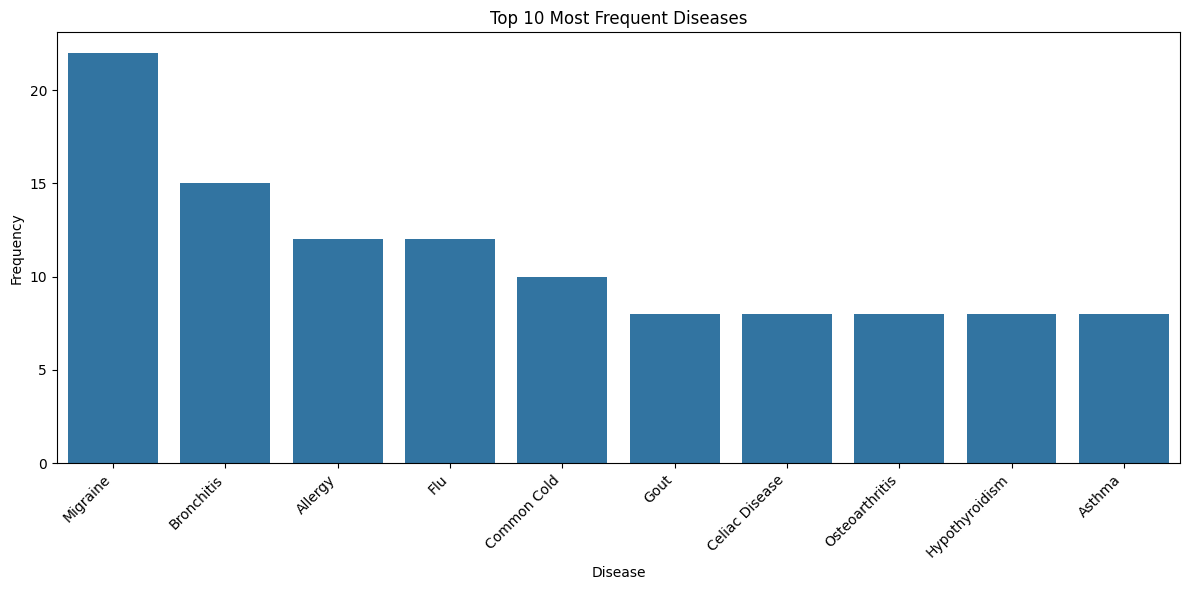

In [8]:
# Top 10 value counts for 'Disease' column
top_10_diseases = disease_data['Disease'].value_counts().dropna().nlargest(10)

# Barplot Top 10 Freq Diseases
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_diseases.index, y=top_10_diseases.values)
plt.title('Top 10 Most Frequent Diseases')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

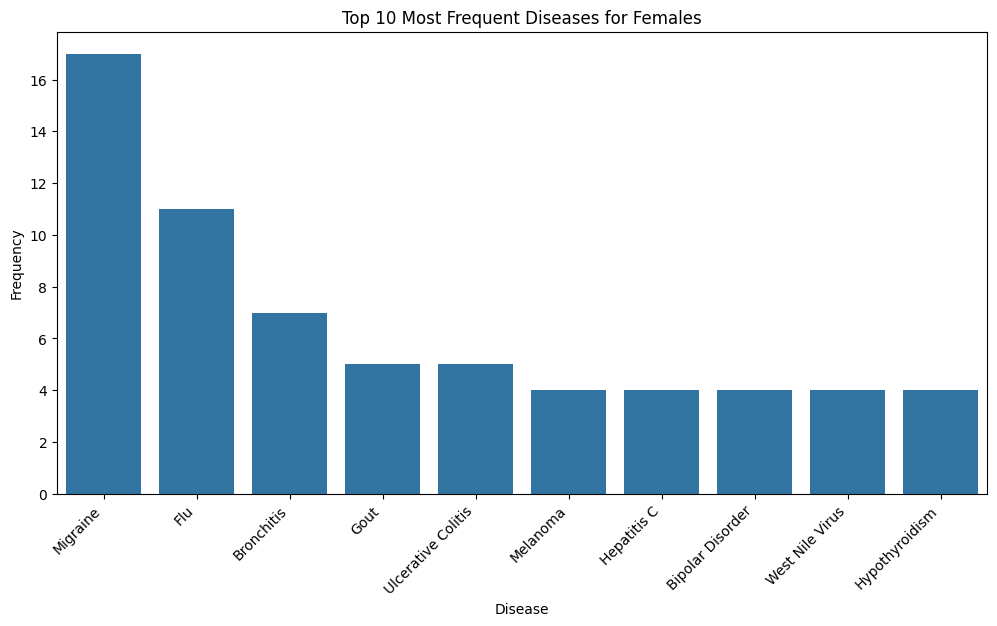

In [9]:
# Top 10 value counts for 'Disease' column for Females
top_10_female_diseases = disease_data.loc[disease_data['Gender'] == 'Female', 'Disease'].value_counts().dropna().nlargest(10)

# Barplot Top 10 Freq Diseases for Female
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_female_diseases.index, y=top_10_female_diseases.values)
plt.title('Top 10 Most Frequent Diseases for Females')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

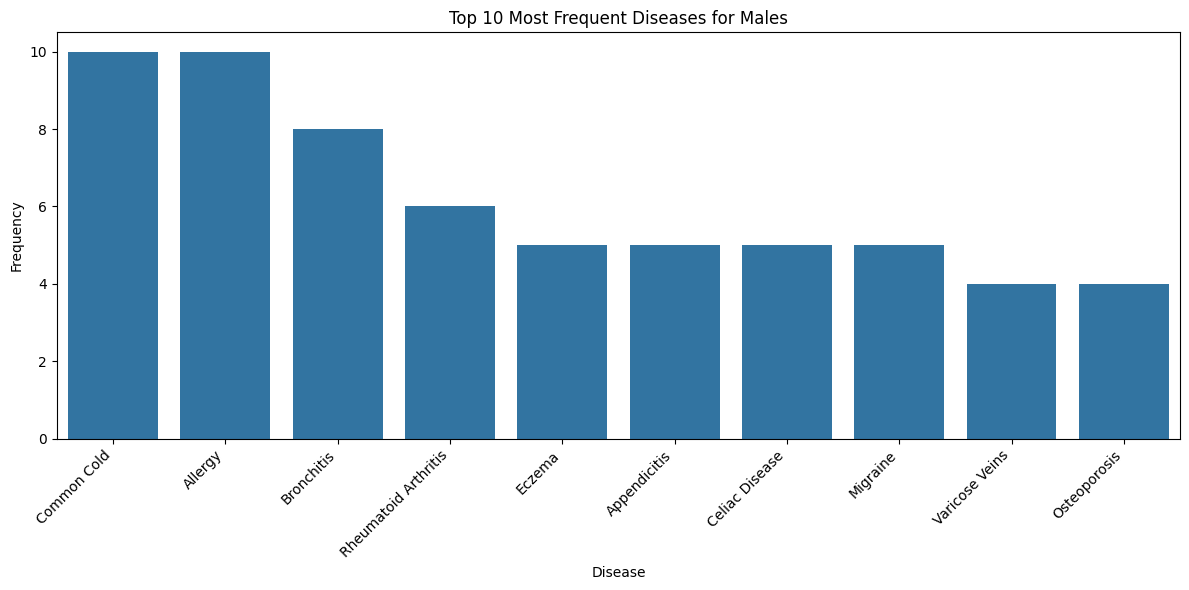

In [10]:
# Top 10 value counts for 'Disease' column for Males
top_10_male_diseases = disease_data.loc[disease_data['Gender'] == 'Male', 'Disease'].value_counts().dropna().nlargest(10)

# Barplot Top 10 Freq Diseases for Males
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_male_diseases.index, y=top_10_male_diseases.values)
plt.title('Top 10 Most Frequent Diseases for Males')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Severity Level

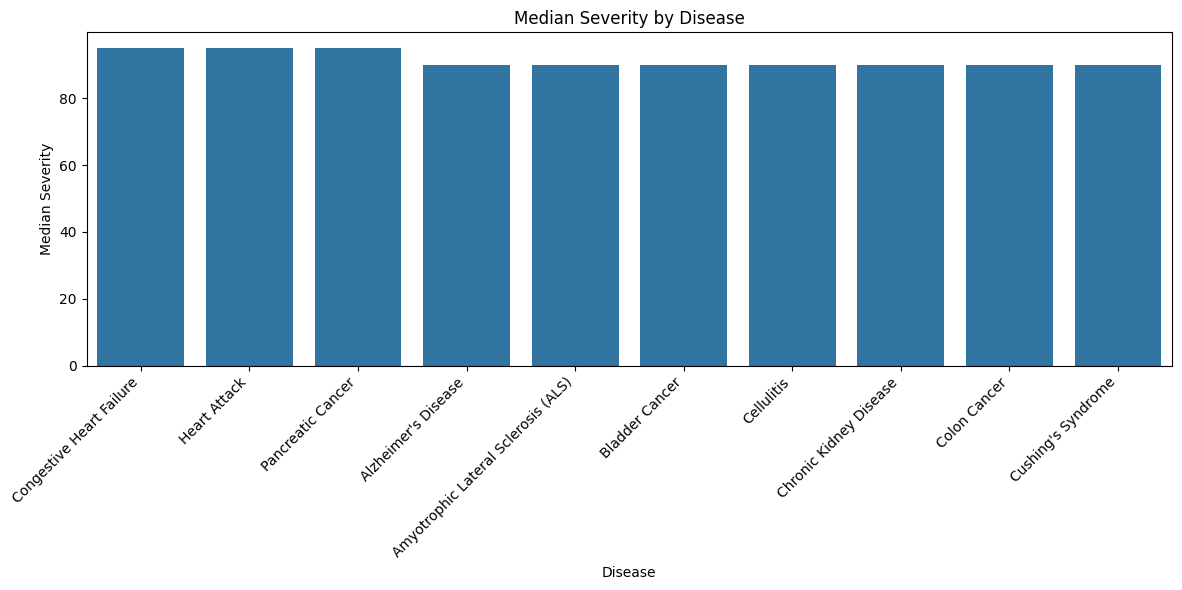

In [11]:
# Convert 'Severity' column to numeric if it contains non-numeric values
disease_data['Severity'] = pd.to_numeric(disease_data['Severity'], errors='coerce')

# median severity by disease
median_severity_by_disease = disease_data.groupby(['Disease'])['Severity'].median().dropna().nlargest(10).round(2)

# Barplot top 10 median severity by disease
plt.figure(figsize=(12, 6))
sns.barplot(x=median_severity_by_disease.index, y=median_severity_by_disease.values)
plt.title('Median Severity by Disease')
plt.xlabel('Disease')
plt.ylabel('Median Severity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

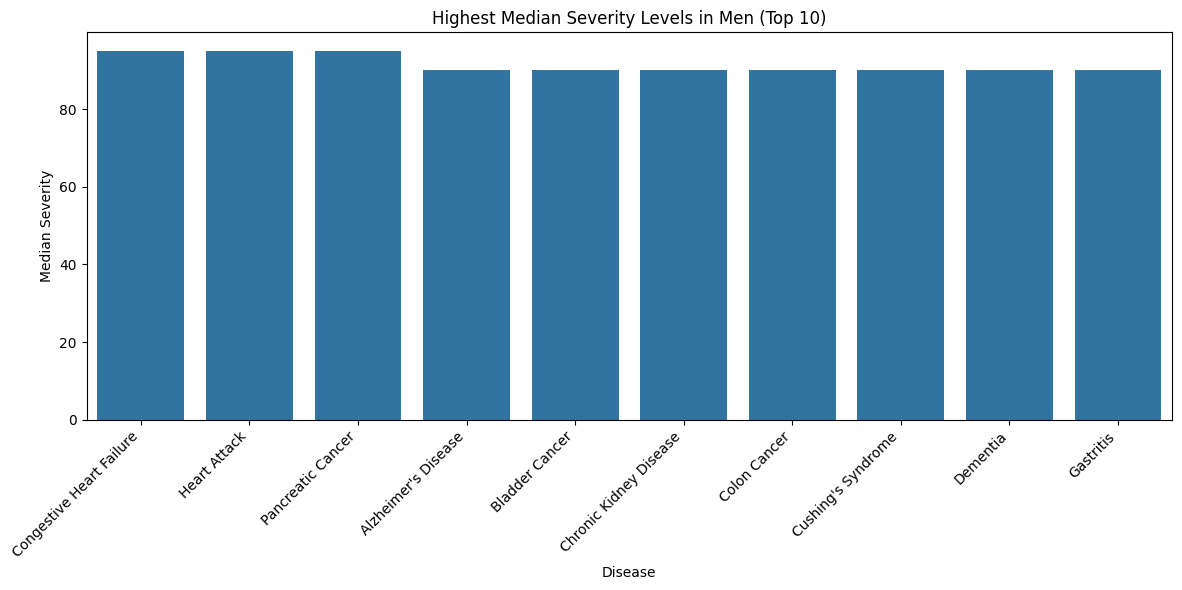

In [12]:
# Convert 'Severity' column to numeric if it contains non-numeric values
disease_data['Severity'] = pd.to_numeric(disease_data['Severity'], errors='coerce')

# Filter data for men only
men_data = disease_data[disease_data['Gender'] == 'Male']

# Calculate median severity for men
median_severity_men = men_data.groupby('Disease')['Severity'].median().dropna().round(2)

# Top 10 highest Median Severity in men
highest_median_severity_men = median_severity_men.nlargest(10)

# Barplot top 10 median severity by disease
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_median_severity_men.index, y=highest_median_severity_men.values)
plt.title('Highest Median Severity Levels in Men (Top 10)')
plt.xlabel('Disease')
plt.ylabel('Median Severity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# QA Note: Data suggest that men have Ovariance Cancer | These type of inividuals identify as male but may have been born female at birth. (non-binary/Transgender)
# Original data set
data.loc[data['Disease'] == 'Ovarian Cancer']

Disease  Age  Gender  Latitude  Longitude           Symptom_1  \
128  Ovarian Cancer   55    Male    42.145    -94.305  Abdominal bloating   
292  Ovarian Cancer   50    Male    44.586    -96.781  Abdominal bloating   
400  Ovarian Cancer   50    Male    44.586    -96.781  Abdominal bloating   
487  Ovarian Cancer   50  Female    42.145    -94.305  Abdominal bloating   
596  Ovarian Cancer   50  Female    42.145    -94.305  Abdominal bloating   
705  Ovarian Cancer   50  Female    42.145    -94.305  Abdominal bloating   

       Symptom_2                Symptom_3  Symptom_4  Severity  
128  Pelvic pain  Changes in bowel habits        NaN      90.0  
292  Pelvic pain  Changes in bowel habits        NaN      90.0  
400  Pelvic pain  Changes in bowel habits        NaN      90.0  
487  Pelvic pain  Changes in bowel habits        NaN      90.0  
596  Pelvic pain  Changes in bowel habits        NaN      90.0  
705  Pelvic pain  Changes in bowel habits        NaN      90.0

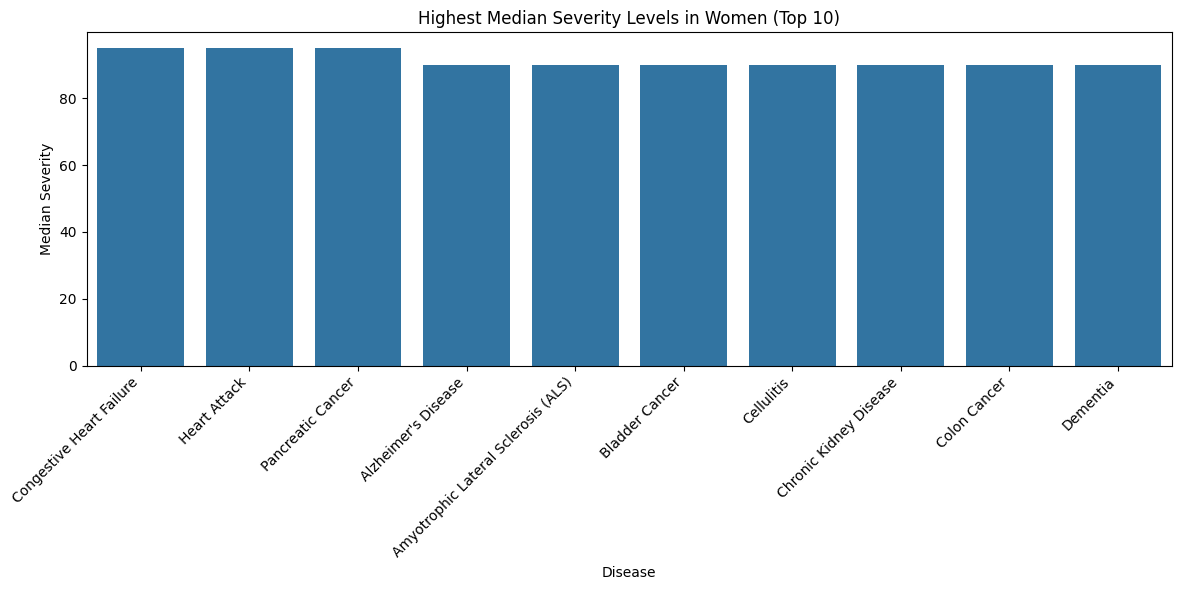

In [14]:
# Convert 'Severity' column to numeric if it contains non-numeric values
disease_data['Severity'] = pd.to_numeric(disease_data['Severity'], errors='coerce')

# Filter data for women only
female_data = disease_data[disease_data['Gender'] == 'Female']

# median severity for women
median_severity_female = female_data.groupby('Disease')['Severity'].median().dropna().round(2)

# Top 10 severity level disease for females
highest_median_severity_female = median_severity_female.nlargest(10)


# Barplot top 10 median severity by disease for female
plt.figure(figsize=(12, 6))
sns.barplot(x=highest_median_severity_female.index, y=highest_median_severity_female.values)
plt.title('Highest Median Severity Levels in Women (Top 10)')
plt.xlabel('Disease')
plt.ylabel('Median Severity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Scatter Matrix

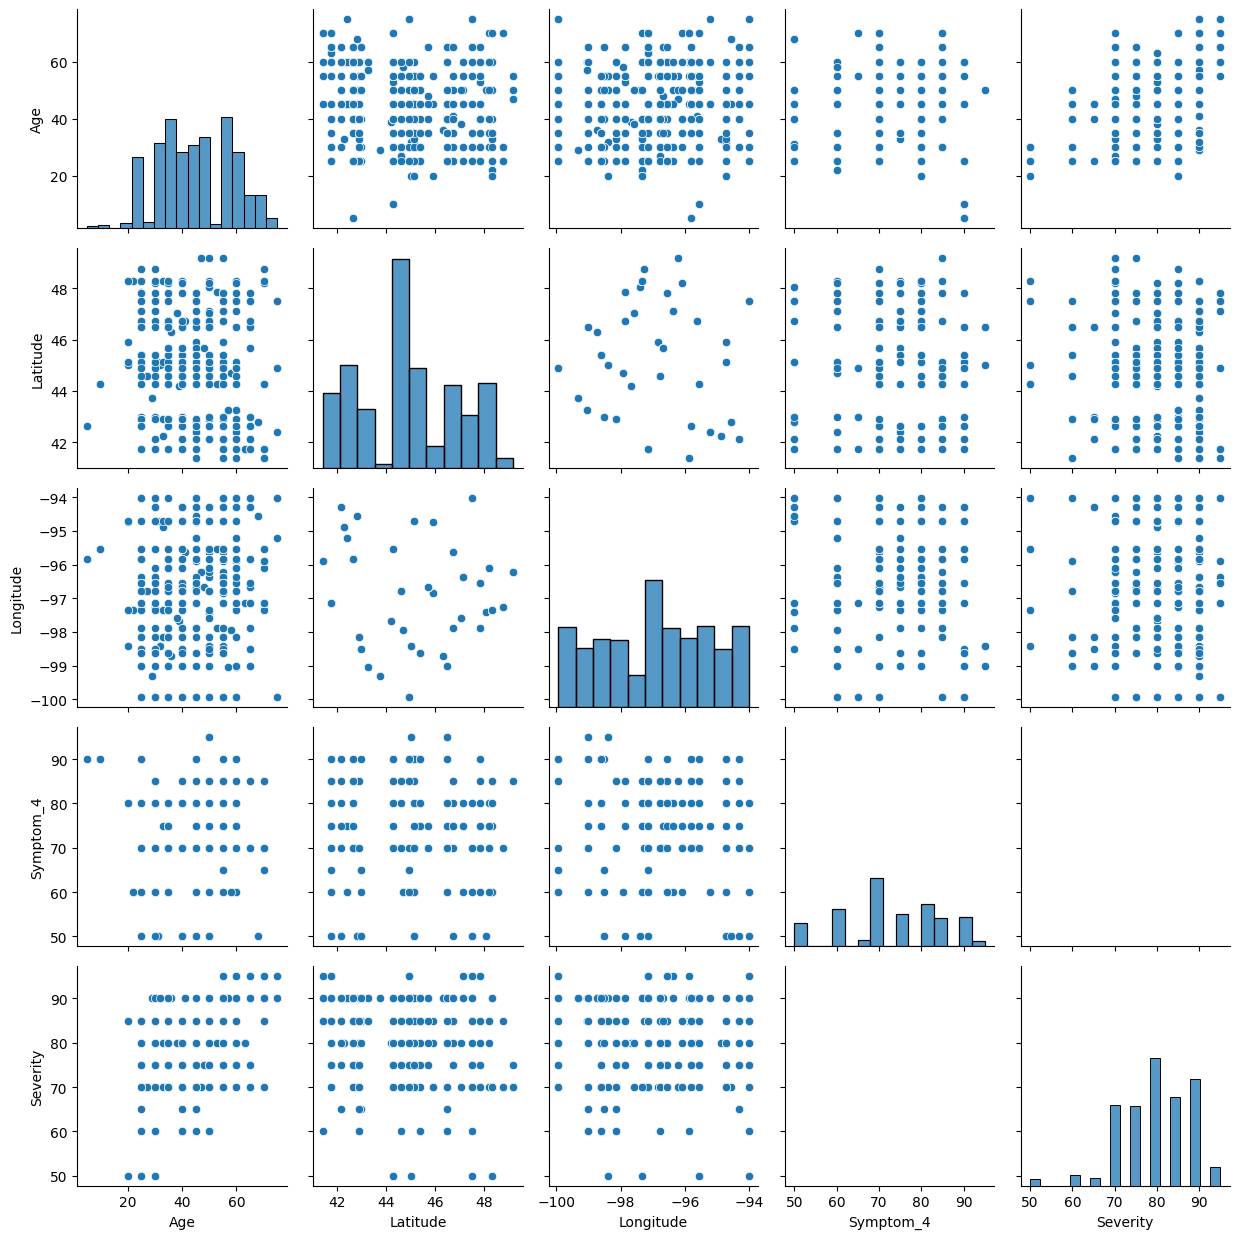

In [15]:
from pandas.plotting import scatter_matrix

# Features and target relationship.
# Note: Only numerical values will show relationships

attributes = ['Disease','Age','Gender','Latitude','Longitude','Symptom_1','Symptom_2','Symptom_3','Symptom_4', 'Severity']

# plots scatterplots and histograms when variable is compared against itself
sns.pairplot(disease_data[attributes], height=2.5)
plt.tight_layout()
plt.show()

## Data Processing

In [16]:
# Check if any disease has data for Symptom_2
diseases_with_symptom_2 = disease_data[disease_data['Symptom_2'].notna()]

# Filter diseases without valid (NaN) Symptom_2 values
diseases_without_symptom_2 = disease_data[disease_data['Symptom_2'].isna()]

# Display the diseases with Symptom_2
print("Diseases with Symptom_2 data:")
print(diseases_with_symptom_2[['Disease', 'Symptom_2']])

# Display the diseases without Symptom_2 data
print("\nDiseases without Symptom_2 data:")
print(diseases_without_symptom_2[['Disease', 'Symptom_2']])

# Compare diseases to see if there are common diseases in both
common_diseases = set(diseases_with_symptom_2['Disease']).intersection(set(diseases_without_symptom_2['Disease']))

# Print common diseases
print("\nCommon Diseases in both datasets (with and without Symptom_2 data):")
print(common_diseases)

Diseases with Symptom_2 data:
                                    Disease                   Symptom_2
0                               Common Cold                    Sneezing
1                                       Flu                       Cough
2                                Bronchitis         Shortness of breath
3                                  Migraine                      Nausea
4                                   Allergy                   Skin rash
..                                      ...                         ...
784            Restless Legs Syndrome (RLS)  Constant urge to move legs
785                      Sjogren's Syndrome                   Dry mouth
786                 Spinal Muscular Atrophy          Difficulty walking
787  Temporomandibular Joint Disorder (TMJ)          Difficulty chewing
789                         Turner Syndrome                 Webbed neck

[784 rows x 2 columns]

Diseases without Symptom_2 data:
               Disease Symptom_2
166            

In [17]:
# Update Symptom 2 column, there is no data in the data set to use for imputing missing values
disease_data.loc[disease_data['Symptom_2'].isna(), 'Symptom_2'] = 'No Symptom'
disease_data

Disease  Age  Gender  Latitude  Longitude  \
0                               Common Cold   45    Male    42.387    -95.223   
1                                       Flu   63  Female    41.722    -97.154   
2                                Bronchitis   27    Male    44.586    -96.781   
3                                  Migraine   57  Female    43.251    -99.042   
4                                   Allergy   31    Male    45.129    -94.714   
..                                      ...  ...     ...       ...        ...   
785                      Sjogren's Syndrome   35    Male    46.491    -99.016   
786                 Spinal Muscular Atrophy   25  Female    44.903    -99.937   
787  Temporomandibular Joint Disorder (TMJ)   50    Male    45.129    -94.714   
788                       Tourette Syndrome   55  Female    47.819    -96.562   
789                         Turner Syndrome   40    Male    42.145    -94.305   

                                  Symptom_1            Symptom_2  \
0                                Runny nose             Sneezing   
1                                     Fever                Cough   
2                                     Cough  Shortness of breath   
3                                  Headache               Nausea   
4                                Itchy eyes            Skin rash   
..                                      ...                  ...   
785                                Dry eyes            Dry mouth   
786                                Weakness   Difficulty walking   
787                                Jaw pain   Difficulty chewing   
788  Tics (involuntary movements or sounds)           No Symptom   
789                           Short stature          Webbed neck   

              Symptom_3  Symptom_4  Severity  
0                   NaN       60.0       NaN  
1               Fatigue        NaN      80.0  
2                   NaN        NaN      70.0  
3                   NaN        NaN      90.0  
4                   NaN       50.0       NaN  
..                  ...        ...       ...  
785             Fatigue        NaN      85.0  
786  Breathing problems        NaN      70.0  
787                 NaN       75.0       NaN  
788                 NaN       80.0       NaN  
789                 NaN       85.0       NaN  

[790 rows x 10 columns]

#### Symptom_3

In [18]:
# Check if any disease has data for Symptom_3
diseases_with_symptom_3 = disease_data[disease_data['Symptom_3'].notna()]

# Filter diseases without valid (NaN) Symptom_3 values
diseases_without_symptom_3 = disease_data[disease_data['Symptom_3'].isna()]

# Display the diseases with Symptom_3
print("Diseases with Symptom_3 data:")
print(diseases_with_symptom_3[['Disease', 'Symptom_3']])

# Display the diseases without Symptom_3 data
print("\nDiseases without Symptom_3 data:")
print(diseases_without_symptom_3[['Disease', 'Symptom_3']])

# Compare diseases to see if there are common diseases in both
common_diseases = set(diseases_with_symptom_3['Disease']).intersection(set(diseases_without_symptom_3['Disease']))

# Print common diseases
print("\nCommon Diseases in both datasets (with and without Symptom_3 data):")
print(common_diseases)

Diseases with Symptom_3 data:
                     Disease                     Symptom_3
1                        Flu                       Fatigue
11                       Flu                       Fatigue
23                       Flu                       Fatigue
31                       Flu                       Fatigue
43                       Flu                       Fatigue
..                       ...                           ...
780        Pernicious Anemia           Shortness of breath
781   Polymyalgia Rheumatica                      Hip pain
783    Postpartum Depression  Difficulty bonding with baby
785       Sjogren's Syndrome                       Fatigue
786  Spinal Muscular Atrophy            Breathing problems

[486 rows x 2 columns]

Diseases without Symptom_3 data:
                                    Disease Symptom_3
0                               Common Cold       NaN
2                                Bronchitis       NaN
3                                  Migrain

In [19]:
# Update common symptoms_3 with exsiting data
disease_data.loc[disease_data['Disease'] == 'Sinusitis', 'Symptom_3'] = 'Sinus pressure'
disease_data.loc[disease_data['Disease'] == 'Migraine', 'Symptom_3'] = 'Sensitivity to light'
disease_data.loc[disease_data['Disease'] == 'Flu', 'Symptom_3'] = 'Fatigue'

In [20]:
# Update Symptom 3 column null data to no symptom
disease_data.loc[disease_data['Symptom_3'].isna(), 'Symptom_3'] = 'No Symptom'
disease_data

Disease  Age  Gender  Latitude  Longitude  \
0                               Common Cold   45    Male    42.387    -95.223   
1                                       Flu   63  Female    41.722    -97.154   
2                                Bronchitis   27    Male    44.586    -96.781   
3                                  Migraine   57  Female    43.251    -99.042   
4                                   Allergy   31    Male    45.129    -94.714   
..                                      ...  ...     ...       ...        ...   
785                      Sjogren's Syndrome   35    Male    46.491    -99.016   
786                 Spinal Muscular Atrophy   25  Female    44.903    -99.937   
787  Temporomandibular Joint Disorder (TMJ)   50    Male    45.129    -94.714   
788                       Tourette Syndrome   55  Female    47.819    -96.562   
789                         Turner Syndrome   40    Male    42.145    -94.305   

                                  Symptom_1            Symptom_2  \
0                                Runny nose             Sneezing   
1                                     Fever                Cough   
2                                     Cough  Shortness of breath   
3                                  Headache               Nausea   
4                                Itchy eyes            Skin rash   
..                                      ...                  ...   
785                                Dry eyes            Dry mouth   
786                                Weakness   Difficulty walking   
787                                Jaw pain   Difficulty chewing   
788  Tics (involuntary movements or sounds)           No Symptom   
789                           Short stature          Webbed neck   

                Symptom_3  Symptom_4  Severity  
0              No Symptom       60.0       NaN  
1                 Fatigue        NaN      80.0  
2              No Symptom        NaN      70.0  
3    Sensitivity to light        NaN      90.0  
4              No Symptom       50.0       NaN  
..                    ...        ...       ...  
785               Fatigue        NaN      85.0  
786    Breathing problems        NaN      70.0  
787            No Symptom       75.0       NaN  
788            No Symptom       80.0       NaN  
789            No Symptom       85.0       NaN  

[790 rows x 10 columns]

#### Symptom_4

In [21]:
# Check if any disease has data for Symptom_4
diseases_with_symptom_4 = disease_data[disease_data['Symptom_4'].notna()]

# Filter diseases without valid (NaN) Symptom_4 values
diseases_without_symptom_4 = disease_data[disease_data['Symptom_4'].isna()]

# Display the diseases with Symptom_4
print("Diseases with Symptom_4 data:")
print(diseases_with_symptom_4[['Disease', 'Symptom_4']])

# Display the diseases without Symptom_4 data
print("\nDiseases without Symptom_4 data:")
print(diseases_without_symptom_4[['Disease', 'Symptom_4']])

# Compare diseases to see if there are common diseases in both
common_diseases = set(diseases_with_symptom_4['Disease']).intersection(set(diseases_without_symptom_4['Disease']))

# Print common diseases
print("\nCommon Diseases in both datasets (with and without Symptom_4 data):")
print(common_diseases)

Diseases with Symptom_4 data:
                                    Disease  Symptom_4
0                               Common Cold       60.0
4                                   Allergy       50.0
6                               Common Cold       60.0
8                                   Allergy       50.0
10                              Common Cold       60.0
..                                      ...        ...
782                               Porphyria       70.0
784            Restless Legs Syndrome (RLS)       80.0
787  Temporomandibular Joint Disorder (TMJ)       75.0
788                       Tourette Syndrome       80.0
789                         Turner Syndrome       85.0

[269 rows x 2 columns]

Diseases without Symptom_4 data:
                     Disease  Symptom_4
1                        Flu        NaN
2                 Bronchitis        NaN
3                   Migraine        NaN
5                        Flu        NaN
7                   Migraine        NaN
..          

In [22]:
# Update Symptom_4 column with no_symptom.
# Note: Some diseases for symptom_4 dont have values to impute. For instance, an average for a SPECIFIC disease group can vary based on the disease type. Some symptoms have different symptom_4 values which can have different averages depending on the disease
# Changing to categorical to indicate either Yes or No symptom if a value is present.

disease_data['New_Column'] = disease_data['Symptom_4'].apply(lambda x: 'Yes' if pd.isna(x) else 'No Symptom')

# Remove orginal Symptom_4 and rename new column
disease_data.drop('Symptom_4', axis=1, inplace=True)
disease_data.rename(columns={'New_Column': 'Symptom_4'}, inplace=True)
disease_data

Disease  Age  Gender  Latitude  Longitude  \
0                               Common Cold   45    Male    42.387    -95.223   
1                                       Flu   63  Female    41.722    -97.154   
2                                Bronchitis   27    Male    44.586    -96.781   
3                                  Migraine   57  Female    43.251    -99.042   
4                                   Allergy   31    Male    45.129    -94.714   
..                                      ...  ...     ...       ...        ...   
785                      Sjogren's Syndrome   35    Male    46.491    -99.016   
786                 Spinal Muscular Atrophy   25  Female    44.903    -99.937   
787  Temporomandibular Joint Disorder (TMJ)   50    Male    45.129    -94.714   
788                       Tourette Syndrome   55  Female    47.819    -96.562   
789                         Turner Syndrome   40    Male    42.145    -94.305   

                                  Symptom_1            Symptom_2  \
0                                Runny nose             Sneezing   
1                                     Fever                Cough   
2                                     Cough  Shortness of breath   
3                                  Headache               Nausea   
4                                Itchy eyes            Skin rash   
..                                      ...                  ...   
785                                Dry eyes            Dry mouth   
786                                Weakness   Difficulty walking   
787                                Jaw pain   Difficulty chewing   
788  Tics (involuntary movements or sounds)           No Symptom   
789                           Short stature          Webbed neck   

                Symptom_3  Severity   Symptom_4  
0              No Symptom       NaN  No Symptom  
1                 Fatigue      80.0         Yes  
2              No Symptom      70.0         Yes  
3    Sensitivity to light      90.0         Yes  
4              No Symptom       NaN  No Symptom  
..                    ...       ...         ...  
785               Fatigue      85.0         Yes  
786    Breathing problems      70.0         Yes  
787            No Symptom       NaN  No Symptom  
788            No Symptom       NaN  No Symptom  
789            No Symptom       NaN  No Symptom  

[790 rows x 10 columns]

### Severity

In [23]:
# Check if any disease has data for Severity
diseases_with_severity = disease_data[disease_data['Severity'].notna()]

# Filter diseases without valid (NaN) Severity values
diseases_without_severity = disease_data[disease_data['Severity'].isna()]

# Display the diseases with Severity
print("Diseases with Severity data:")
print(diseases_with_severity[['Disease', 'Severity']])

# Display the diseases without Severity data
print("\nDiseases without Severity data:")
print(diseases_without_severity[['Disease', 'Severity']])

# Compare diseases to see if there are common diseases in both
common_diseases = set(diseases_with_severity['Disease']).intersection(set(diseases_without_severity['Disease']))

# Print common diseases
print("\nCommon Diseases in both datasets (with and without Severity data):")
print(common_diseases)

Diseases with Severity data:
                     Disease  Severity
1                        Flu      80.0
2                 Bronchitis      70.0
3                   Migraine      90.0
5                        Flu      80.0
7                   Migraine      90.0
..                       ...       ...
780        Pernicious Anemia      80.0
781   Polymyalgia Rheumatica      85.0
783    Postpartum Depression      75.0
785       Sjogren's Syndrome      85.0
786  Spinal Muscular Atrophy      70.0

[521 rows x 2 columns]

Diseases without Severity data:
                                    Disease  Severity
0                               Common Cold       NaN
4                                   Allergy       NaN
6                               Common Cold       NaN
8                                   Allergy       NaN
10                              Common Cold       NaN
..                                      ...       ...
782                               Porphyria       NaN
784           

In [24]:
# Updating category to reflect Serverity
# Changing numeric to category. Some diseases dont have a serverity level to impute a common number like the median.
# The two common diseases above will be changed to Yes or No to follow data type in column
disease_data['New_Column'] = disease_data['Severity'].apply(lambda x: 'No' if pd.isna(x) else 'Yes')


# Remove orginal Symptom_4 and rename new column
# Place dataframe back into orriginal order
disease_data.drop('Severity', axis=1, inplace=True)
disease_data.rename(columns={'New_Column': 'Severity'}, inplace=True)
disease_data = disease_data[['Disease','Age','Gender','Latitude','Longitude', 'Symptom_1',	'Symptom_2',	'Symptom_3',	'Symptom_4', 'Severity']]
disease_data

Disease  Age  Gender  Latitude  Longitude  \
0                               Common Cold   45    Male    42.387    -95.223   
1                                       Flu   63  Female    41.722    -97.154   
2                                Bronchitis   27    Male    44.586    -96.781   
3                                  Migraine   57  Female    43.251    -99.042   
4                                   Allergy   31    Male    45.129    -94.714   
..                                      ...  ...     ...       ...        ...   
785                      Sjogren's Syndrome   35    Male    46.491    -99.016   
786                 Spinal Muscular Atrophy   25  Female    44.903    -99.937   
787  Temporomandibular Joint Disorder (TMJ)   50    Male    45.129    -94.714   
788                       Tourette Syndrome   55  Female    47.819    -96.562   
789                         Turner Syndrome   40    Male    42.145    -94.305   

                                  Symptom_1            Symptom_2  \
0                                Runny nose             Sneezing   
1                                     Fever                Cough   
2                                     Cough  Shortness of breath   
3                                  Headache               Nausea   
4                                Itchy eyes            Skin rash   
..                                      ...                  ...   
785                                Dry eyes            Dry mouth   
786                                Weakness   Difficulty walking   
787                                Jaw pain   Difficulty chewing   
788  Tics (involuntary movements or sounds)           No Symptom   
789                           Short stature          Webbed neck   

                Symptom_3   Symptom_4 Severity  
0              No Symptom  No Symptom       No  
1                 Fatigue         Yes      Yes  
2              No Symptom         Yes      Yes  
3    Sensitivity to light         Yes      Yes  
4              No Symptom  No Symptom       No  
..                    ...         ...      ...  
785               Fatigue         Yes      Yes  
786    Breathing problems         Yes      Yes  
787            No Symptom  No Symptom       No  
788            No Symptom  No Symptom       No  
789            No Symptom  No Symptom       No  

[790 rows x 10 columns]

In [25]:
# QA Check if all missing values have been addressed
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Disease    790 non-null    object 
 1   Age        790 non-null    int64  
 2   Gender     790 non-null    object 
 3   Latitude   790 non-null    float64
 4   Longitude  790 non-null    float64
 5   Symptom_1  790 non-null    object 
 6   Symptom_2  790 non-null    object 
 7   Symptom_3  790 non-null    object 
 8   Symptom_4  790 non-null    object 
 9   Severity   790 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 61.8+ KB


In [26]:
# Split data by 20% and initilize random state 42
from sklearn.model_selection import train_test_split

X = disease_data.drop('Disease', axis=1) # Features
y = disease_data['Disease'] # Target

# Training testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline


# Categorical atributes for pipeline creation
cat_attributes = X_train[['Gender','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Severity']].columns.copy().to_list()


# Encoder pipeline
encoder = OneHotEncoder()

# Pipeline for column transfer
cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

In [28]:
from sklearn.compose import ColumnTransformer

# Column transfer - Use pipeline to update data
preprocessing = ColumnTransformer([
        ("cat", cat_pipeline, cat_attributes)]
)


# Fit processing to training data
X_train_prepared = preprocessing.fit_transform(X_train)


# Below, are options to view training data after processing

# View endcoding for categorical features
#pd.DataFrame(X_train_prepared, index=X_train.index).head()

# View endcoded data with column names
#pd.DataFrame(X_train_prepared, columns=preprocessing.get_feature_names_out()).head()

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit the encoder to your training target labels and transform them
y_train_encoded = encoder.fit_transform(y_train)

### RandomForest Classifier

In [30]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Model with defult params
random_forest_clf = RandomForestClassifier(random_state=42)

# RFC
random_forest_clf.fit(X_train_prepared, y_train_encoded)

RandomForestClassifier(random_state=42)

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


# Cross validation for predictions
y_train_pred_rfc = cross_val_predict(random_forest_clf, X_train_prepared, y_train_encoded, cv=3)

# Calculate the confusion matrix first
rfc_cm = confusion_matrix(y_train_encoded, y_train_pred_rfc)

# Calculating FP/FN/TP/TN
rfc_FP = rfc_cm.sum(axis=0) - np.diag(rfc_cm)
rfc_FN = rfc_cm.sum(axis=1) - np.diag(rfc_cm)
rfc_TP = np.diag(rfc_cm)
rfc_TN = rfc_cm.sum() - (rfc_FP + rfc_FN + rfc_TP)

# results
print("Overall Metrics:")
print("rfc_TP:", rfc_TP.sum())
print("rfc_TN:", rfc_TN.sum())
print("rfc_FP:", rfc_FP.sum())
print("rfc_FN:", rfc_FN.sum())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Overall Metrics:
rfc_TP: 510
rfc_TN: 124382
rfc_FP: 122
rfc_FN: 122


In [32]:
from sklearn.metrics import confusion_matrix

# QA measure, checking to see if classes match matrix
n_classes = len(np.unique(y_train_encoded))
print(f"Number of classes: {n_classes}")

rfc_cm = confusion_matrix(y_train_encoded, y_train_pred_rfc)

print(f"Shape of confusion matrix: {rfc_cm.shape}")

Number of classes: 198
Shape of confusion matrix: (198, 198)


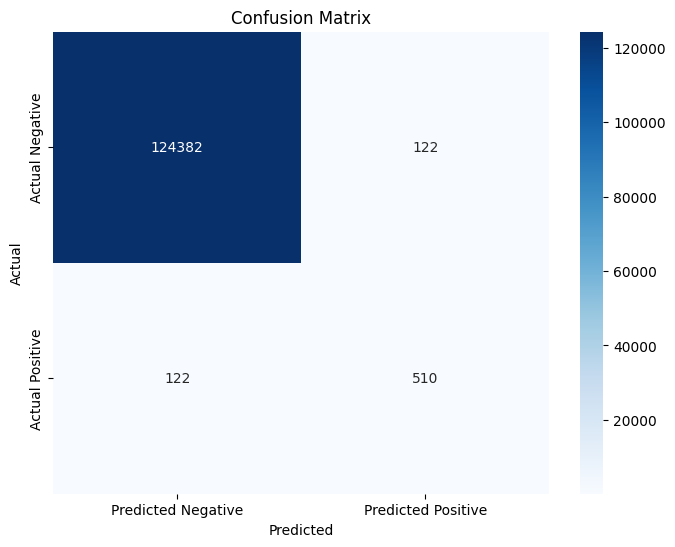

In [33]:
# confusion matrix
cm = np.array([[rfc_TN.sum(), rfc_FP.sum()], [rfc_FN.sum(), rfc_TP.sum()]])

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

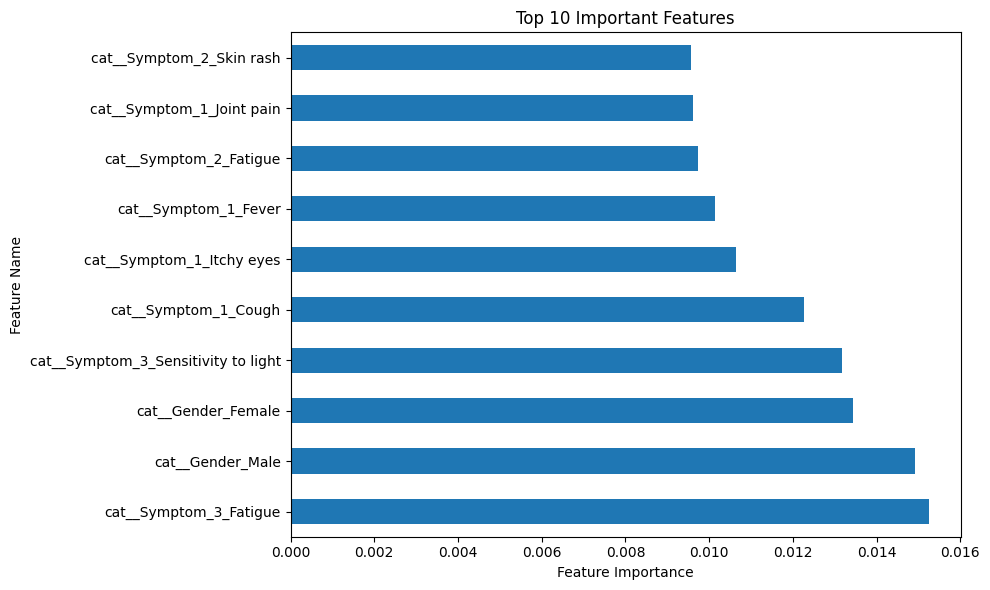

In [34]:
# Feature importance
importance = random_forest_clf.feature_importances_ # Get feature importances from the model

# Get feature names after transformation
feature_names = preprocessing.get_feature_names_out()

# Create a pandas Series for feature importance
feature_importance = pd.Series(importance, index=feature_names)

# Sort features by importance in sorted
feature_importance = feature_importance.sort_values(ascending=False)

# Select the top N features
top_n = 10
feature_importance_top = feature_importance.head(top_n)

# Plot, top 10 important features
plt.figure(figsize=(10, 6))
feature_importance_top.plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title(f"Top {top_n} Important Features")
plt.tight_layout()
plt.show()

## Decision Tree Classifier

In [35]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Model with defult params
dt_clf = DecisionTreeClassifier(random_state=42)

# DTC
dt_clf.fit(X_train_prepared, y_train_encoded)

DecisionTreeClassifier(random_state=42)

In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


# Cross validation:
y_train_pred_dt = cross_val_predict(dt_clf, X_train_prepared, y_train_encoded, cv=3)

# Calculate confusion matrix
dt_cm = confusion_matrix(y_train_encoded, y_train_pred_dt)

# FP/FN/TP/TN
dt_FP = dt_cm.sum(axis=0) - np.diag(dt_cm)
dt_FN = dt_cm.sum(axis=1) - np.diag(dt_cm)
dt_TP = np.diag(dt_cm)
dt_TN = dt_cm.sum() - (dt_FP + dt_FN + dt_TP)

# Display  results
print("Overall Metrics:")
print("dt_TP:", dt_TP.sum())
print("dt_TN:", dt_TN.sum())
print("dt_FP:", dt_FP.sum())
print("dt_FN:", dt_FN.sum())

Overall Metrics:
dt_TP: 494
dt_TN: 124366
dt_FP: 138
dt_FN: 138


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


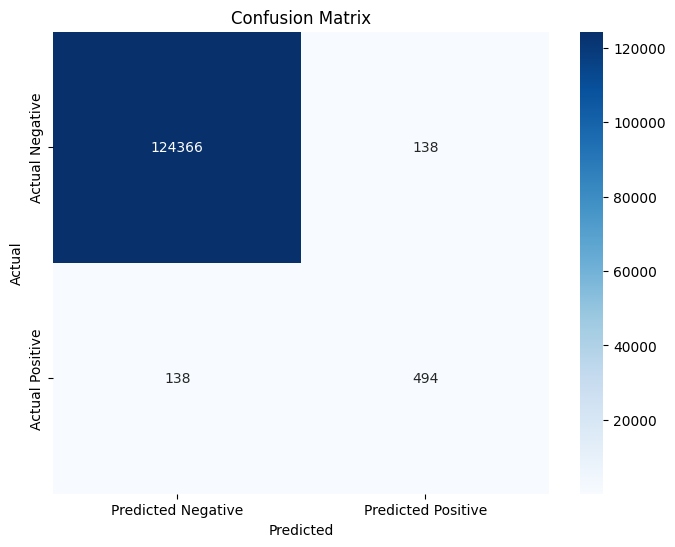

In [37]:
# confusion matrix
cm = np.array([[dt_TN.sum(), dt_FP.sum()], [dt_FN.sum(), dt_TP.sum()]])

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

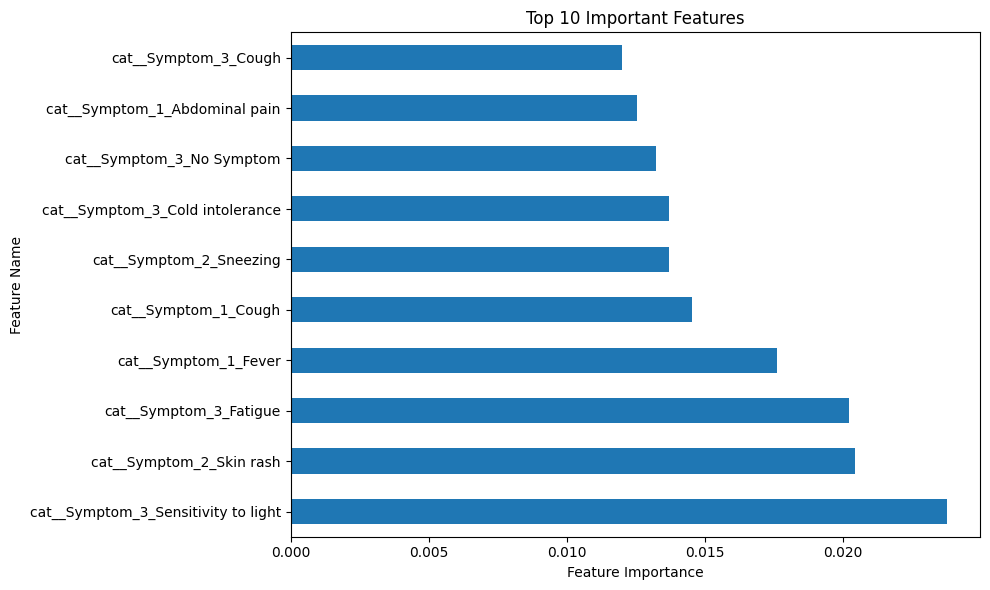

In [38]:
# Get feature importances from the model
importance = dt_clf.feature_importances_

# Get feature names after transformation
feature_names = preprocessing.get_feature_names_out()

# Create a pandas Series for feature importance
feature_importance = pd.Series(importance, index=feature_names)

# Top 10 feature importance sorted
feature_importance = feature_importance.sort_values(ascending=False)

# Select the top N features
top_n = 10
feature_importance_top = feature_importance.head(top_n)

# Plot, top 10 important features
plt.figure(figsize=(10, 6))
feature_importance_top.plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title(f"Top {top_n} Important Features")
plt.tight_layout()
plt.show()

Note: Further evaluation of precision, recall, and F1-score can be performed to determine the best model, especially in cases of class imbalance where these metrics provide a more balanced view of performance compared to accuracy. Additionally, the ROC curve and AUC (Area Under the Curve) can be assessed to understand the model's ability to distinguish between positive and negative classes across various thresholds. To further optimize model performance, hyperparameter tuning can be conducted through grid search or random search techniques, adjusting parameters such as learning rate, regularization strength, and model complexity to find the most effective configuration for improved accuracy and generalization.